In [137]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# CNN and RNN for Fashion MNIST

In [138]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [139]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [140]:
train_images.shape

(60000, 28, 28)

In [141]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [142]:
test_images.shape

(10000, 28, 28)

### Preprocess the data

C:\Users\2mscdsa24\AppData\Local\Temp\ipykernel_15356\1675608565.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


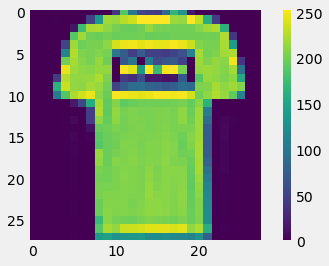

In [143]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [144]:

train_images = train_images / 255.0

test_images = test_images / 255.0

### Build the model

In [145]:
#image dataset
#model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [146]:
#model1
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='softmax'),
    keras.layers.Dense(10)
])

In [147]:
#model_3
model2= models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [148]:
#model_4
model3 = models.Sequential()
model3.add(layers.Dense(10, activation='softmax', input_shape=(10000,)))
model3.add(layers.Dense(10, activation='softmax'))
model3.add(layers.Dense(1, activation='sigmoid'))

### Compile the model

In [149]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [150]:
model1.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [151]:
model2.compile(optimizer='Adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [152]:
model3.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### fit the model

In [59]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 704us/step - loss: 0.4953 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.3756 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 1s 693us/step - loss: 0.3370 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.3100 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.2937 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 1s 692us/step - loss: 0.2794 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 1s 693us/step - loss: 0.2685 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.2575 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.2481 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 1s 694u

In [60]:
model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 826us/step - loss: 1.3601 - accuracy: 0.7019
Epoch 2/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.6817 - accuracy: 0.7460
Epoch 3/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.5929 - accuracy: 0.7547
Epoch 4/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.5704 - accuracy: 0.7620
Epoch 5/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.5561 - accuracy: 0.7715


In [69]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.2324 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 1s 733us/step - loss: 0.2232 - accuracy: 0.9164
Epoch 3/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.2195 - accuracy: 0.9175
Epoch 4/5
1875/1875 [==============================] - 1s 728us/step - loss: 0.2106 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.2048 - accuracy: 0.9241


In [70]:
model3.fit(train_images, train_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 850us/step - loss: 0.5421 - accuracy: 0.7932
Epoch 2/7
1875/1875 [==============================] - 2s 857us/step - loss: 0.5274 - accuracy: 0.8131
Epoch 3/7
1875/1875 [==============================] - 2s 862us/step - loss: 0.5116 - accuracy: 0.8223
Epoch 4/7
1875/1875 [==============================] - 2s 855us/step - loss: 0.5011 - accuracy: 0.8263
Epoch 5/7
1875/1875 [==============================] - 2s 843us/step - loss: 0.4935 - accuracy: 0.8307
Epoch 6/7
1875/1875 [==============================] - 2s 851us/step - loss: 0.4863 - accuracy: 0.8332
Epoch 7/7
1875/1875 [==============================] - 2s 838us/step - loss: 0.4815 - accuracy: 0.8358


### Evaluate accuracy

In [153]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 2.3072 - accuracy: 0.1339 - 268ms/epoch - 856us/step
Test accuracy: 0.1339000016450882


In [154]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 2.3023 - accuracy: 0.1056 - 271ms/epoch - 866us/step
Test accuracy: 0.10559999942779541


In [156]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 2.3072 - accuracy: 0.1339 - 177ms/epoch - 565us/step
Test accuracy: 0.1339000016450882


In [73]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3397 - accuracy: 0.8880 - 166ms/epoch - 531us/step
Test accuracy: 0.8880000114440918


### summary

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [76]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [78]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                160016    
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [79]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                100010    
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 100,131
Trainable params: 100,131
Non-trainable params: 0
_________________________________________________________________


### RNN

In [189]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

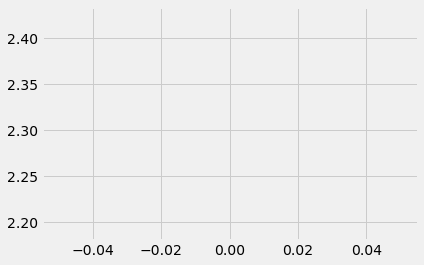

In [184]:
plt.plot(test_loss, color='red',label='Real IBM Stock Price')

In [160]:
dataset = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [161]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

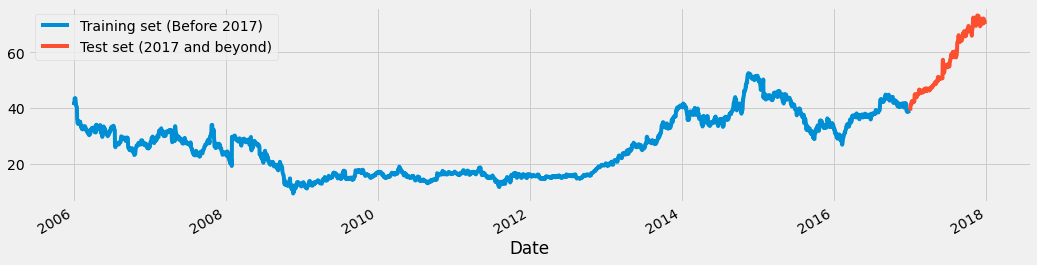

In [162]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.show()

In [163]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [175]:
train = dataset.loc[:, ['Open']].values 
train

array([[39.69],
       [41.22],
       [40.93],
       ...,
       [69.77],
       [70.12],
       [69.79]])

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.47856696],
       [0.50250313],
       [0.49796621],
       ...,
       [0.94915519],
       [0.95463079],
       [0.94946809]])

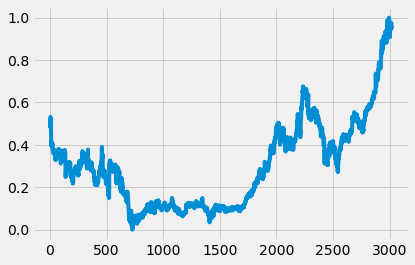

In [177]:
plt.plot(train_scaled)

In [185]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [186]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [258]:
regressor = Sequential()


regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [259]:
#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [260]:
#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 0.3973
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.2091
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 0.1409
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0960
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0717
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0471
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0425
Epoch 8/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0336
Epoch 9/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 10/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0191


In [254]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 1)               

In [245]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [251]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

array([[0.47856696],
       [0.50250313],
       [0.49796621],
       ...,
       [0.94915519],
       [0.95463079],
       [0.94946809]])